In [ ]:
# from google.colab import loadmat
from google.colab import drive 
drive.mount('/content/drive')
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('/content/capacity_test.mat')
voltage = mat["vcell"]
time = mat["time"]
cap = mat["cap"]
curr = mat["curr"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install PeakUtils
!pip install msgpack
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


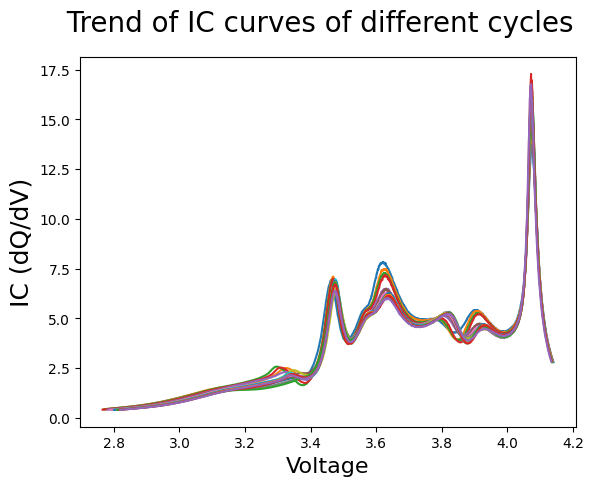

In [ ]:
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
from scipy.signal import find_peaks

charge_cap = []
voltages = []
IC = []
peak1_position = []
peak1_value = []
peak2_position = []
peak2_value = []
peak3_position = []
peak3_value = []
capacity_deg = []

# j = 4
for j in range(4,9):
  for z in range(15):
    # i=0
    if len(voltage[z][j]) == 1:
      continue

    if j == 5 or j == 7:
      continue
    
    IC.clear()
    charge_cap.clear()
    voltages.clear()

    data = pd.DataFrame(voltage[z][j])
    data["time"] = time[z][j]
    data["cap"] = cap[z][j]
    data["curr"] = curr[z][j]

    # print(cap[z][j][-1][0])
    capacity_deg.append(cap[z][j][-1][0]) # capacity degradation 15 values for finding pearson coefficient wrt IC values

    voltages.append(0)
    index = 0
    for k in range(0, len(time[z][j]), 100):
      while voltage[z][j][k][0] == voltages[index]:
        k += 1
      charge_cap.append((curr[z][j][k][0] * time[z][j][k][0])/3600)   # charging capacity Q = I.t
      voltages.append(voltage[z][j][k][0])    
      index += 1

    voltages.pop(0)
    
    # capacity_deg.append(cap[z][j][][])
    for l in range(0, len(voltages)-1):
      IC.append((charge_cap[l+1] - charge_cap[l])/(voltages[l+1] - voltages[l]))
    IC.append(0)

    # Plot with noise
    # plt.plot(voltages, IC)
    # fig, ax = plt.subplots()
    # ax.plot(voltages, IC)
    # plt.ylabel('IC (dQ/dV)', fontsize=18)
    # plt.xlabel('Voltage', fontsize=16)

    # Moving Average Filtering

    result = []     #IC smoothened array
    window_size = 25
    moving_sum = sum(IC[:window_size])
    result.append(moving_sum / window_size)
    for i in range(len(IC) - window_size):
      moving_sum += (IC[i + window_size] - IC[i])
      result.append(moving_sum / window_size)

    result_volt = []
    window_size2 = 25
    moving_sum2 = sum(voltages[:window_size2])
    result_volt.append(moving_sum2 / window_size2)
    for i in range(len(voltages) - window_size2):
      moving_sum2 += (voltages[i + window_size2] - voltages[i])
      result_volt.append(moving_sum2 / window_size2)

    if j == 4:  # for W8 only
      plt.plot(result_volt, result)
      plt.suptitle(' Trend of IC curves of different cycles ', fontsize=20)
      plt.ylabel('IC (dQ/dV)', fontsize=18)
      plt.xlabel('Voltage', fontsize=16)

    result_volt = np.array(result_volt)
    result = np.array(result)

  ################################################################################

    #Find peaks
    peaks = find_peaks(result ,height = 4, distance = 70, prominence = 0.01, width=(None,150) )
    height = peaks[1]['peak_heights'] #list of the heights of the peaks
    peak_pos = result_volt[peaks[0]] #list of the peaks positions

    # print(height, peak_pos)
    # Plotting
    # fig = plt.figure()
    # ax = fig.subplots()
    # ax.plot(result_volt, result)
    # ax.scatter(peak_pos, height, color = 'r', marker = 'D', label = 'Maxima')
    # plt.ylabel('IC (dQ/dV)', fontsize=18)
    # plt.xlabel('Voltage', fontsize=16)
    # ax.legend()
    # ax.grid()
    # plt.show()

    peak1_position.append(peak_pos[0])
    peak1_value.append(height[0])


    peak2_position.append(peak_pos[len(peak_pos) - 2])
    peak2_value.append(height[len(peak_pos) - 2])

    peak3_position.append(peak_pos[len(peak_pos) - 1])
    peak3_value.append(height[len(peak_pos) - 1])
    

# print(peak1_value, peak1_position, peak2_value, peak2_position, peak3_value, peak3_position)

# **SOH Calculation**

In [ ]:
#########################################

# SOH Calculation
  
SOH = []

for k in range(0, len(capacity_deg)):

  # SOH Calculation
  Qrated = 5.00
  Qcurr = capacity_deg[k]
  SOH.append((Qcurr/Qrated)*100)
  print(SOH[k])
  

SOH = np.array(SOH)

97.53717764268318
96.6911134764552
95.46935105241006
94.58640288296672
93.04337745557228
92.80673985762729
91.93528033379052
91.14398468782504
90.64082977688975
90.72214502957132
90.56722691870398
90.21118811104033
89.91548151191738
89.67510024524398
89.13707126412127
97.31768782486519
96.67212537560198
95.29375026110145
94.02612658043704
92.90927680532137
92.69143436700105
91.83780234919654
91.07723152256675
90.88170833802887
90.86416019383404
90.56721225480239
90.21106807821326
89.94071151730087
89.55949983596803
89.18185899423229
97.37454541789161
96.55576828138696
95.83108674188455
95.12040791594319
94.36646061705218
93.93474021140072
93.55702286760012
93.04138804177443
92.5675471237964
92.29947091539701
92.04823347445992


# Plot Capacity vs Diag#

Text(0, 0.5, 'Capacity')

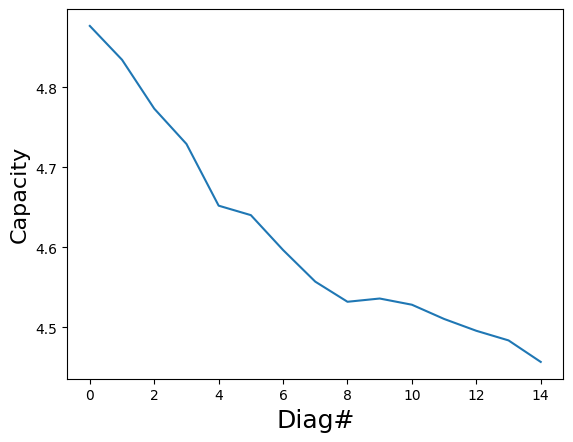

In [ ]:
# Plot Capacity vs Diag#
arr1 = []
for i in range(15): # for W8 cell only
  arr1.append(capacity_deg[i])

plt.plot(arr1)
plt.xlabel('Diag#', fontsize=18)
plt.ylabel('Capacity', fontsize=16)

# **Time Interval of equal discharge voltage difference (TIEDVD)**

[38687, 37547, 37002, 36574, 35797, 35677, 35408, 35324, 35024, 35136, 35131, 35004, 35002, 34896, 34734, 38797, 37735, 37291, 36899, 36352, 36095, 35729, 35647, 35556, 35500, 35466, 35366, 35374, 35270, 35156, 39262, 37781, 37530, 37119, 36643, 36515, 36368, 36142, 35896, 35942, 35919]


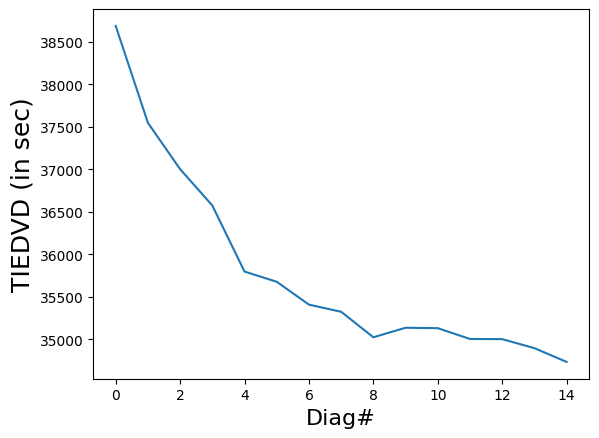

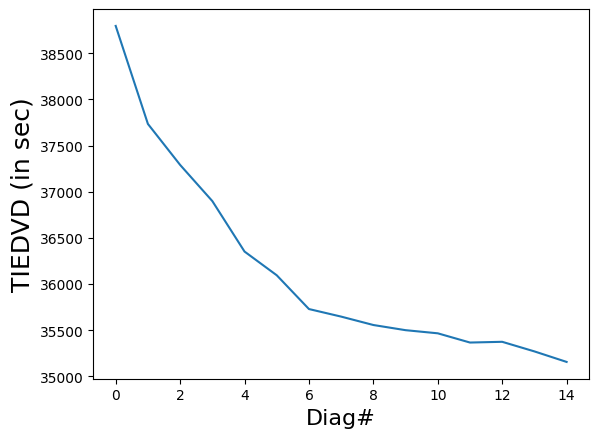

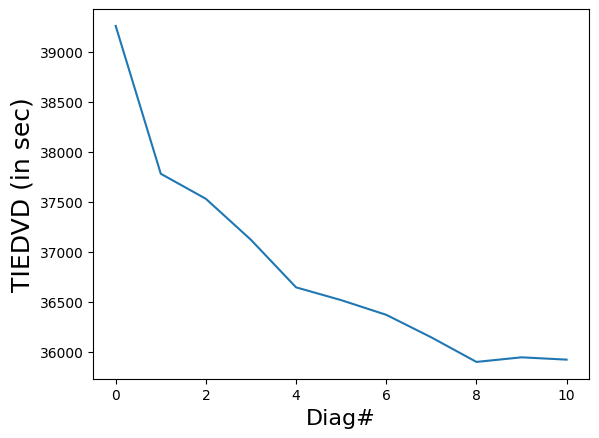

In [ ]:
##############

  #  Health indicator - Time Interval of equal discharge voltage difference (TIEDVD)


HI = []
idx = 0

# j = 4
new_path = os.path.join('/content', "TIEDVD")  #C/2
new_path = new_path+ ".csv"
file_name = "TIEDVD" + ".csv"

for j in range(4,9):
  for i in range(15):

    if len(voltage[i][j]) == 1:
      continue
    if j==5 or j==7:
      continue

    data2 = pd.DataFrame(voltage[i][j])
    data2["time"] = time[i][j]
    data2["cap"] = cap[i][j]

    data2.to_csv(new_path, index = False)
    
    
    df = pd.read_csv(file_name)

    x = df['time']
    y = df['0'] #voltage
    z = df['cap']

    # fig, ax = plt.subplots()
    # ax.plot(x,y)
    # fig.suptitle('TIEDVD', fontsize=20)
    # plt.ylabel('Voltage', fontsize=18)
    # plt.xlabel('Time', fontsize=16)

    def find_root(x,y):
      s = np.abs(np.diff(np.sign(y))).astype(bool)
      i = 0
      for k in s:
        i = i+1
        if k == True:
          return i

    Vmax = 4.0
    Vmin = 3.5
    tvmax = find_root(x, y-Vmax)    #tvmax
    tvmin = find_root(x, y-Vmin)   #tvmin
    # print(z, z1)
    HI.append(np.abs(tvmax-tvmin))

    f = open(file_name, "w+")
    f.close()

arr = []


for i in range(len(HI)):
  arr.append(HI[i])
  if i == 14 or i == 29 or i == len(HI)-1:
    fig, ax = plt.subplots()
    ax.plot(arr)
    # fig.suptitle('TIEDVD', fontsize=20)
    plt.ylabel('TIEDVD (in sec)', fontsize=18)
    plt.xlabel('Diag#', fontsize=16)
    arr.clear()

print(HI)


# **Pearson Coeffcient Calculation**

-0.9286693467835295

0.337725493650795

0.9645893440616679

-0.6544799769552011

0.025980510741549286

-0.7665212443666586

0.9633232878188192



Text(0.5, 0, 'TIEDVD')

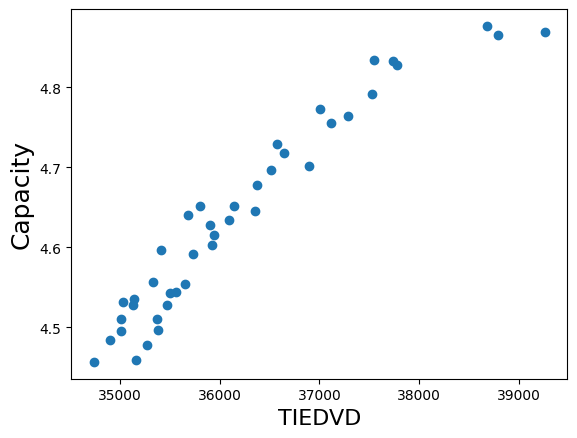

In [ ]:
def pearson_calc(arr):
  xmean = np.mean(capacity_deg)
  ymean = np.mean(arr)
  num = 0
  denom1 = 0
  denom2 = 0

  for i in range(15):
    num += ((capacity_deg[i] - xmean) * (arr[i] - ymean))
    denom1 += ((capacity_deg[i] - xmean)**2)
    denom2 += ((arr[i] - ymean)**2)

  denom = math.sqrt(denom1 * denom2)

  pearson = num/denom
  print(pearson)
  print()


pearson_calc(peak1_value) #
pearson_calc(peak1_position)
pearson_calc(peak2_value) #
pearson_calc(peak2_position) #
pearson_calc(peak3_value) 
pearson_calc(peak3_position) #

pearson_calc(HI)

# plt.scatter(peak1_position, capacity_deg)
# plt.ylabel('Capacity', fontsize=18)
# plt.xlabel('Peak 1 Position', fontsize=16)

# plt.scatter(peak1_position, capacity_deg)
# plt.ylabel('Capacity', fontsize=18)
# plt.xlabel('Peak Position', fontsize=16)

plt.scatter(HI, capacity_deg)
plt.ylabel('Capacity', fontsize=18)
plt.xlabel('TIEDVD', fontsize=16)

# **Training Data** 

In [ ]:
# Training Data
  
training = pd.DataFrame()
training['HI1'] = HI
training['HI2'] = peak1_value
training['HI3'] = peak2_value
# training['HI4'] = peak3_position
training['SOH'] = SOH
 
new_path = os.path.join('/content', "training_data" )  #C/2
new_path = new_path+ ".csv"
training.to_csv(new_path, index = False)

file_name = "training_data" + ".csv"
df = pd.read_csv(file_name)

X_train = df[{'HI1','HI2','HI3'}]
Y_train = df['SOH']


<ipython-input-10-48ce43e28bf0>:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = df[{'HI1','HI2','HI3'}]


# **Testing Phase**

[13.40493717  5.40313682  7.76764567  6.82130831] [4.07391895 3.9035823  3.61645816 3.46263497]
[13.92322215  5.31901334  7.42262418  6.92278719] [4.07537773 3.90702584 3.62470166 3.4670883 ]
[14.62322773  5.15585343  4.88363009  7.26923921  6.49106083] [4.07240263 3.90754672 3.78110796 3.62154587 3.46572001]
[15.36573548  4.87752247  6.82978311  5.77335642] [4.07404064 3.90558542 3.62425191 3.46825773]
[15.5577042   4.78578983  4.91589753  6.43742604  5.19714158] [4.07403627 3.89908507 3.78277467 3.62007994 3.47078355]
[15.37103709  4.70970525  5.030352    6.2920255   5.89177573] [4.0741283  3.91351604 3.79702831 3.62935324 3.47121251]
[15.3350632   4.63416222  5.09092884  6.23836889  5.93331887] [4.07445438 3.91416113 3.80127458 3.63108328 3.47492023]
[16.40920739  4.48514737  5.21616716  6.10297864  6.29617322] [4.0739518  3.92292097 3.81225173 3.63873933 3.47704603]
[15.63112011  4.47470712  5.10577498  6.09951727  6.126382  ] [4.07299208 3.93353251 3.8104259  3.63283457 3.47698265

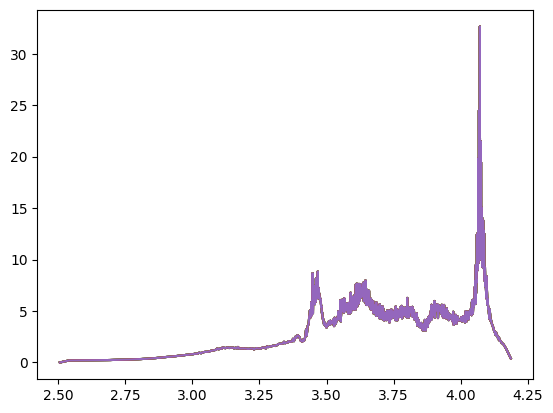

In [ ]:
from numpy.core.fromnumeric import ndim
from zmq.constants import NULL
######################################################################


# Testing Phase

charge_cap_t = []
voltages_t = []
IC_t = []
peak1_position_t = []
peak1_value_t = []
peak2_position_t = []
peak2_value_t = []
peak3_position_t = []
peak3_value_t = []
capacity_deg2 = []

j = 5 #W9
idx_t=0
for z in range(15):
  # i=0
  IC_t.clear()
  charge_cap_t.clear()
  voltages_t.clear()

  if len(voltage[z][j]) == 1:
    continue
  # print(type(voltage[z][j][0][0]))
 

  data3 = pd.DataFrame(voltage[z][j])
  data3["time"] = time[z][j]
  data3["cap"] = cap[z][j]
  data3["curr"] = curr[z][j]



  # print(cap[z][j][-1][0])
  capacity_deg2.append(cap[z][j][-1][0]) # capacity degradation 15 values for finding SOH at that point

  voltages_t.append(0)
  index = 0
  for k in range(0, len(time[z][j]), 100):
    while voltage[z][j][k][0] == voltages_t[index]:
      k += 1
    charge_cap_t.append((curr[z][j][k][0] * time[z][j][k][0])/3600)   # charging capacity Q = I.t
    voltages_t.append(voltage[z][j][k][0])    
    index += 1

  voltages_t.pop()

  # capacity_deg.append(cap[z][j][][])

  for l in range(0, len(voltages_t)-1):
    if abs(voltages_t[l+1] - voltages_t[l]) == 0:
      print(l+1)
      print(l)
    IC_t.append((charge_cap_t[l+1] - charge_cap_t[l])/(voltages_t[l+1] - voltages_t[l]))
  IC_t.append(0)

  plt.plot(voltages, IC)
  # fig, ax = plt.subplots()
  # ax.plot(voltages_t, IC_t)

  # Moving Average Filtering

  result_t = []     #IC smoothened array
  window_size = 25
  moving_sum_t = sum(IC_t[:window_size])
  result_t.append(moving_sum_t / window_size)
  for i in range(len(IC_t) - window_size):
    moving_sum_t += (IC_t[i + window_size] - IC_t[i])
    result_t.append(moving_sum_t / window_size)

  result_volt_t = []
  window_size2_t = 25
  moving_sum2_t = sum(voltages_t[:window_size2_t])
  result_volt_t.append(moving_sum2_t / window_size2_t)
  for i in range(len(voltages_t) - window_size2_t):
    moving_sum2_t += (voltages_t[i + window_size2_t] - voltages_t[i])
    result_volt_t.append(moving_sum2_t / window_size2_t)

  # plt.plot(result_volt_t, result_t)

  result_volt_t = np.array(result_volt_t)
  result_t = np.array(result_t)

################################################################################
  
  #Find peaks
  #Find peaks
  peaks = find_peaks(result_t ,height = 4, distance = 70, prominence = 0.01, width=(None,150) )
  height_t = peaks[1]['peak_heights'] #list of the heights of the peaks
  peak_pos_t = result_volt_t[peaks[0]] #list of the peaks positions

  print(height_t, peak_pos_t)
  #Plotting
  # fig = plt.figure()
  # ax = fig.subplots()
  # ax.plot(result_volt_t, result_t)
  # ax.scatter(peak_pos_t, height_t, color = 'r', marker = 'D', label = 'Maxima')
  # ax.legend()
  # ax.grid()
  # plt.show()

  peak1_position_t.append(peak_pos_t[0])
  peak1_value_t.append(height_t[0])


  peak2_position_t.append(peak_pos_t[len(peak_pos_t) - 2])
  peak2_value_t.append(height_t[len(peak_pos_t) - 2])

  peak3_position_t.append(peak_pos_t[len(peak_pos_t) - 1])
  peak3_value_t.append(height_t[len(peak_pos_t) - 1])
# for i in range(1, len(voltages) - 1):
#   if voltages[i-1] == voltages[i]:
#     print(voltages[i])


In [ ]:
##############
# Testing.......

  #  Health indicator - Time Interval of equal discharge voltage difference (TIEDVD)


HI_t = []

j = 5 #W9

new_path = os.path.join('/content', "volt_time_W9")  #C/2
new_path = new_path+ ".csv"
file_name = "volt_time_W9" + ".csv"

for i in range(15):

  if len(voltage[i][j]) == 1:
    # print('here')
    continue

  data2 = pd.DataFrame(voltage[i][j])
  data2["time"] = time[i][j]
  data2["cap"] = cap[i][j]
  
  data2.to_csv(new_path, index = False)
  
  df = pd.read_csv(file_name)

  x_t = df['time']
  y_t = df['0'] #voltage
  z_t = df['cap']

  def find_root_t(x,y):
    s = np.abs(np.diff(np.sign(y))).astype(bool)
    i = 0
    for k in s:
      i = i+1
      if k == True:
        return i

  Vmax = 4.0
  Vmin = 3.5
  tvmax_t = find_root_t(x_t, y_t-Vmax)    #tvmax
  tvmin_t = find_root_t(x_t, y_t-Vmin)   #tvmin
  # print(z, z1)
  HI_t.append(np.abs(tvmax_t-tvmin_t))

  f = open(file_name, "w+")
  f.close()

print(HI_t)


[38661, 37574, 37065, 36586, 35976, 35813, 35526, 35411, 35262, 35260, 35229, 35143, 35116, 35002, 34861]


In [ ]:
# Creating testing dataframe and file

test = pd.DataFrame()
test['HI1'] = HI_t
test['HI2'] = peak1_value_t
test['HI3'] = peak2_value_t
# test['HI4'] = peak3_position_t

new_path = os.path.join('/content', "testing_data" )  #C/2
new_path = new_path+ ".csv"
test.to_csv(new_path, index = False)

file_name_t = "testing_data" + ".csv"
df_t = pd.read_csv(file_name_t)

# x = df['Time']
# y = df['Voltage'] #voltage
# z = df['Capacity']

X_test = df_t[{'HI1','HI2','HI3'}]

<ipython-input-13-09a2b612ba65>:20: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test = df_t[{'HI1','HI2','HI3'}]


# **GPR**

In [ ]:
#===========================================================================
# create the kernel 
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic, ExpSineSquared, ConstantKernel
kernel = RationalQuadratic(length_scale=20, length_scale_bounds=(1e-35, 1e15)) +  RBF( length_scale=100, length_scale_bounds = (1e-25, 1e25))


#===========================================================================
# perform regression 
from sklearn.gaussian_process import GaussianProcessRegressor
regressor = GaussianProcessRegressor(kernel=kernel, alpha = 0.03, n_restarts_optimizer=400)


In [ ]:
#===========================================================================
# fit 
regressor.fit(X_train, Y_train)


GaussianProcessRegressor(alpha=0.03,
                         kernel=RationalQuadratic(alpha=1, length_scale=20) + RBF(length_scale=100),
                         n_restarts_optimizer=400)

In [ ]:
#===========================================================================
# predict for the test data
predictions, std = regressor.predict(X_test, return_std=True)

output = pd.DataFrame({"SOH":predictions})
output.to_csv('results.csv', index=False)

# **Error calculation**

In [ ]:
import math

SOH_actual = []
j = 5 #W9

for k in range(0, len(capacity_deg2)):
  # SOH Calculation
  Qrated = 5.00
  Qcurr = capacity_deg2[k]
  SOH_actual.append((Qcurr/Qrated)*100)
  # print(SOH_actual[k])
  
y_actual = np.array(SOH_actual)
y_predicted = predictions
print(y_actual, predictions)
MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("\nRoot Mean Square Error:\n")
print(RMSE)

[97.48608207 96.69286264 95.43881934 94.45951666 93.13152452 92.85000845
 91.97572289 91.16140285 90.92543568 90.93282887 90.6923931  90.31659347
 90.01428993 89.72858547 89.27289111] [96.64614522 95.87256908 95.06256178 94.12893761 92.62193072 92.21397065
 91.32379573 91.01142971 90.51072733 90.50756592 90.43156195 90.19281638
 90.12074667 89.80066943 89.29145428]

Root Mean Square Error:

0.461448266459806


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# calculate MAE
error = mae(y_actual, y_predicted)
  
# display
print("Mean absolute error : ")
print(error)

score = r2_score(y_actual, y_predicted)
print("The R2 value of our model is {}%".format(round(score, 2) *100))

Mean absolute error : 
0.38241882057302423
The R2 value of our model is 97.0%


# **Actual vs Predicted**

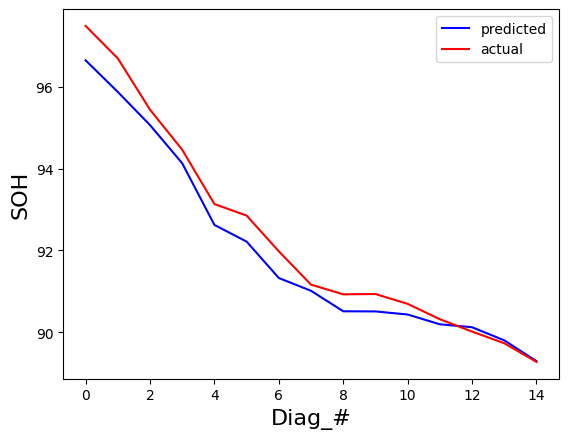

In [ ]:
import seaborn as sns


plt.plot(y_predicted,'-b', label='predicted')
plt.plot(y_actual, '-r', label='actual')
plt.ylabel('SOH', fontsize=16)
plt.xlabel('Diag_#', fontsize=16)
plt.legend()
plt.show()

